In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

# Load data from files

train_dataset = h5py.File('train_catvnoncat.h5', "r")

# Split into x and y

train_X = np.array(train_dataset["train_set_x"][:162])
train_Y = np.array(train_dataset["train_set_y"][:162])
test_X = np.array(train_dataset["train_set_x"][162:])
test_Y = np.array(train_dataset["train_set_y"][162:])
classes = np.array(train_dataset["list_classes"][:])



In [5]:
# Flatten images and normalize pixel values

train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

In [6]:
# Define sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
# Initialize variables and set parameters

X = train_X_flat
Y = train_Y
w = np.zeros((train_X_flat.shape[0],1))
b = 0
num_iterations = 100000
learning_rate = 0.006

# Perform training

for i in range(num_iterations):

    # Save length of X
    m = X.shape[1]
    
    # Calculate sigmoid value and cost given current weights and biases
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m

    # Calculate gradients
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    # Convert cost to scalar
    cost = np.squeeze(cost)
    
    # Take a gradient step
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    if (i % 5 == 4):
        print(f"After {i+1} iterations, the cost is {cost}")

print(f"The final weights are {w}")
print(f"The final bias is {b}")

After 5 iterations, the cost is 0.745918677920964
After 10 iterations, the cost is 0.9784190227402144
After 15 iterations, the cost is 0.8343113679310581
After 20 iterations, the cost is 1.141134378635662
After 25 iterations, the cost is 0.7115547573025564
After 30 iterations, the cost is 0.9684563959155683
After 35 iterations, the cost is 0.7326187484657486
After 40 iterations, the cost is 0.976630399405989
After 45 iterations, the cost is 0.6956802028980843
After 50 iterations, the cost is 0.9214210758619218
After 55 iterations, the cost is 0.6785736602610274
After 60 iterations, the cost is 0.8850948278534894
After 65 iterations, the cost is 0.6594473521469157
After 70 iterations, the cost is 0.849080931825021
After 75 iterations, the cost is 0.6416914904575413
After 80 iterations, the cost is 0.815468388679827
After 85 iterations, the cost is 0.6247297247854863
After 90 iterations, the cost is 0.7837297860201774
After 95 iterations, the cost is 0.6084359719254747
After 100 iteratio

In [32]:
# Compute predicted values
A = sigmoid(np.dot(w.T,test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T,X) + b)

# Compute prediction accuracy
print(f"train accuracy: {1-np.mean(np.abs(Y_predict_train - train_Y)):2f}")
print(f"test accuracy: {1-np.mean(np.abs(Y_predict_test - test_Y)):2f}")

train accuracy: 0.999820
test accuracy: 0.740000


In [50]:
indices = []

# Add indices of incorrect predictions to list

for i in range(len(Y_predict_test[0])):
    if (Y_predict_test[0][i] != test_Y[i]):
        indices.append(i)

print(indices)

[5, 6, 10, 18, 19, 28, 29, 30, 33, 34, 41, 44, 46]


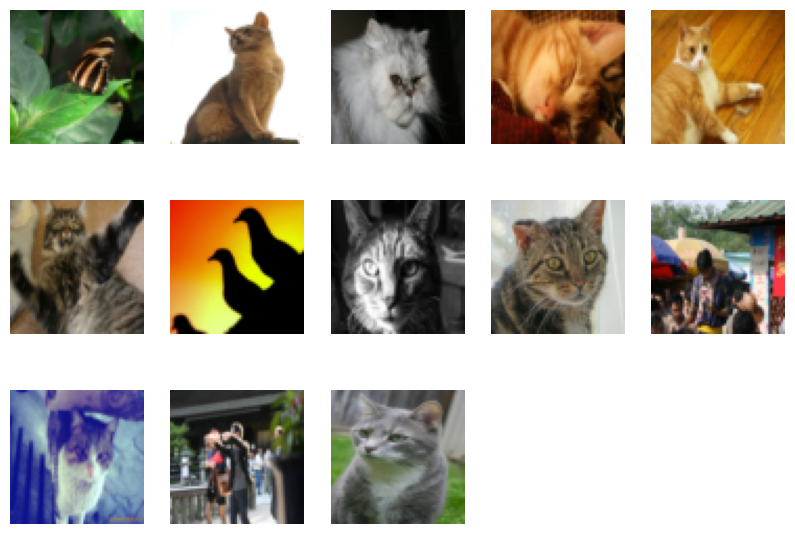

In [57]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 3
columns = 5

k = 1
for i in indices:
    fig.add_subplot(rows, columns, k) # i - 54 is the subplot indices, 1,2,3,4
    plt.imshow(test_X[i])
    plt.axis('off')
    k += 1
    